# Regularization

* a method of adding a **penalty term** to the cost function of a linear regression model, which reduced the magnitude of the coefficients or weights. 
* prevents overfitting, decreases the variance of the model, increases bias (can be adjusted)

## Ridge Regression 
* L2 regularization 
* adds the "squared magnitude" of the coefficient as the **penalty term**

$alpha$ 값을 이용하여 회귀 계수의 크기를 조절 ($alpha$값이 크면 회귀 계수 값이 작아지고, 작으면 회귀 계수 값이 커짐)

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [3]:
boston = pd.read_csv('boston.csv')

In [4]:
X = boston.drop(columns=['PRICE'], axis=1)
y = boston['PRICE']

In [5]:
ridge = Ridge(alpha = 10)
mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * mse_scores)
avg_mse = np.mean(rmse_scores)
print('5 folds 개별 Negative MSE scores {}: '.format(np.round(mse_scores,3)))
print('5 folds 개별 RMSE scores : {}'.format(np.round(rmse_scores,3)))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_mse)) 

5 folds 개별 Negative MSE scores [-11.422 -24.294 -28.144 -74.599 -28.517]: 
5 folds 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


규제를 적용하지 않았을 때보다 RMSE 살짝 감소

In [6]:
# alpha 값을 변경해가며 5 folds 평균 RMSE 구해보기

alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha 값 {}에 대한 5folds의 평균 RMSE: {:.3f}'.format(alpha, avg_rmse))

alpha 값 0에 대한 5folds의 평균 RMSE: 5.829
alpha 값 0.1에 대한 5folds의 평균 RMSE: 5.788
alpha 값 1에 대한 5folds의 평균 RMSE: 5.653
alpha 값 10에 대한 5folds의 평균 RMSE: 5.518
alpha 값 100에 대한 5folds의 평균 RMSE: 5.330


alpha = 100인 L2 규제일 때 RMSE 값이 최소가 됨

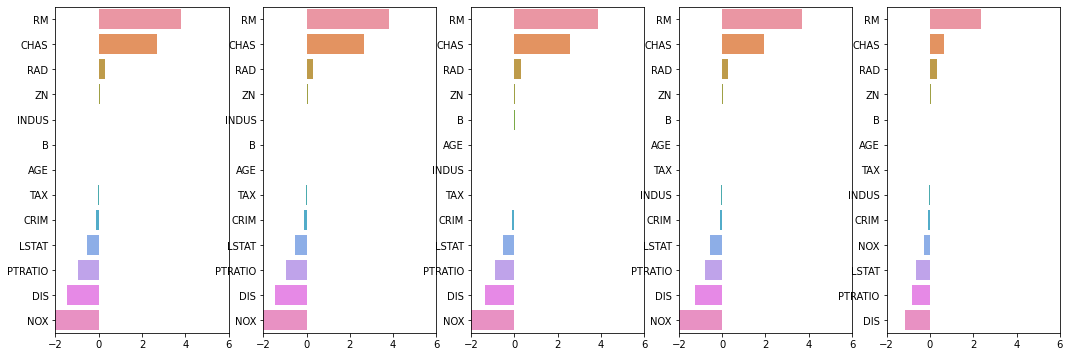

In [7]:
# 각 alpha값에 따른 회귀 계수 값을 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (18,6), nrows=1, ncols=5)
coef_df = pd.DataFrame()

for axis, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X,y)
    # 저장용
    coeff = pd.Series(ridge.coef_, index = X.columns)
    coef_df[alpha] = coeff
    # alpha값에 따른 회귀계수 순위 시각화
    axs[axis].set_xlim(-3,6)
    axs[axis].set_title('alpha: '+str(alpha))
    sns.barplot(x = coeff.sort_values(ascending=False).values, 
                y = coeff.sort_values(ascending=False).index,
                ax = axs[axis])

plt.show()

In [8]:
coef_df.sort_values(by=coef_df.columns[0],ascending=False)

,0.0,0.1,1.0,10.0,100.0
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


'NOX' column의 경우 alpha 값에 따라 회귀 계수가 크게 줄어듦을 확인할 수 있다. 

$alpha$가 커질수록 **회귀계수가 감소**하지만 **0으로는 수렴하지 않는다.**

## Lasso Regression

* W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것 
* L1 규제는 $alpha$ * |W|을 의미, 라쏘 회귀 비용함수의 목표는 RSS(W)+$alpha$ * |W| 식을 최소화하는 W를 찾는 것
* L2 규제가 회귀 계수의 크기를 감소시키는데 반해, L1 규제는 **불필요한 계수를 급격하게 감소시켜 0으로 만들고 제거**함. **Feature Selection**의 특성 가짐!

## Elastic Net 회귀

* 엘라스틱넷 회귀는 L2규제와 L1규제를 결합한 회귀
* 엘라스틱넷 규제 = a * L1규제 + b * L2규제
* lasso regression이 서로 상관관계가 높은 피쳐들의 경우에 이들 중에 중요 피쳐만 셀렉하고 다른 피쳐들은 모두 회귀 계수를 0으로 만드는 성향이 강해서, alpha값에 따라 회귀 계수 값이 급변할 수 있으므로, 이를 완화하기 위해 L2규제를 라쏘에 추가한 것임
* $alpha% parameter 값 = a+b
* l1_ratio parameter 값 = a/(a+b)

#### LASSO

In [1]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        # deciding model
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # cross validation - MSE scores & RMSE scores
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha{} 5fold set avg RMSE:{:.3f}'.format(param, avg_rmse))
        
        # return regression coefficients
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index = X_data_n.columns)
            colname = 'alpha' + str(param)
            coeff_df[colname] = coeff

    return coeff_df

In [9]:
# define alpha params for lasso regression 
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n=X, y_target_n=y)

####### Lasso #######
alpha0.07 5fold set avg RMSE:5.612
alpha0.1 5fold set avg RMSE:5.615
alpha0.5 5fold set avg RMSE:5.669
alpha1 5fold set avg RMSE:5.776
alpha3 5fold set avg RMSE:6.189


alpha = 0.07일 때 RMSE 최소 : 5.612

In [10]:
coeff_lasso_df

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


In [11]:
coeff_lasso_df.sort_values(by='alpha0.07', ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


$alpha$ 크기가 증가함에 따라 일부 피처의 회귀 계수가 아예 0으로 바뀌고 있음. 

- NOX 속성은 $alpha$가 0.07일 때부터 회귀 계수가 0이고
- INDUS, CHAS 같은 속성도 알파 값이 커지면서 0으로 바뀜

#### ELATIC NET

In [12]:
# Define alpha params for elastic net 
# fix l1_ratio as 0.7

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas,
                                       X_data_n=X, y_target_n=y)

####### ElasticNet #######
alpha0.07 5fold set avg RMSE:5.542
alpha0.1 5fold set avg RMSE:5.526
alpha0.5 5fold set avg RMSE:5.467
alpha1 5fold set avg RMSE:5.597
alpha3 5fold set avg RMSE:6.068


alpha = 0.5, l1_ratio=0.7 일 때 RMSE 최소 (5.467)

In [13]:
coeff_elastic_df

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


In [14]:
coeff_elastic_df.sort_values(by='alpha0.07', ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


$alpha$ 값에 따른 피처들의 회귀 계수 값들이 Lasso보다는 상대적으로 0이 되는 값이 적음을 확인할 수 있음

# Data Transformation

* linear regression model assumes a linear relationship btw features and target, predicts a target by finding an optimal linear model
* linear regression model prefers **gaussian (normal) distribution** of **feature & target value**

### Methods
#### Target
* 타겟값은 정규분포 선호, skew되어 있을 시 로그 변환 (0값이 없으면 np.log, 0값이 있으면 np.log1p)
* **타겟값의 경우 일반적으로 로그 변환 적용함!!**

#### Feature
* (1) scaling : 피처들에 대한 균일한 스케일링/정규화 적용 (StandardScaler 이용한 표준 정규 분포 형태 변환 또는 MinMaxScaler를 이용한 최소 0, 최대 1 변환)
* (2) 다항 특성 변환 : 스케일링/정규화 수행한 데이터 세트에 다시 polynomial feature 적용하여 변환
* (3) 로그 변환 : skewness가 심한 중요 피처들에 대해서 log transformation (많이 이용됨!)

In [17]:
# 실습

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
def get_scaled(method = None, p_degree = None, input_data = None):
    if method == 'Standard':    #method1 : 표준 정규 분포 변환
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':    #method2 : 최댓값/최솟값 정규화
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':       #method3 : 로그 변환
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:        #다항식 특성 추가시 다항식 차수 입력
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [19]:
# Ridge regression 
# alpha 값 여러 개로 다르게 적용, RMSE 추출

alphas = [0.1, 1, 10, 100]
scale_methods = [(None,None), ('Standard', None), ('Standard', 2),
                 ('MinMax', None), ('MinMax',2), ('Log',None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled(method = scale_method[0], p_degree = scale_method[1], input_data=X)
    print('\n ## transformation methods:{}, Poly Degree:{}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params = alphas, X_data_n=X_data_scaled, y_target_n = y,
                        verbose=False, return_coeff=False)


 ## transformation methods:None, Poly Degree:None
alpha0.1 5fold set avg RMSE:5.788
alpha1 5fold set avg RMSE:5.653
alpha10 5fold set avg RMSE:5.518
alpha100 5fold set avg RMSE:5.330

 ## transformation methods:Standard, Poly Degree:None
alpha0.1 5fold set avg RMSE:5.826
alpha1 5fold set avg RMSE:5.803
alpha10 5fold set avg RMSE:5.637
alpha100 5fold set avg RMSE:5.421

 ## transformation methods:Standard, Poly Degree:2
alpha0.1 5fold set avg RMSE:8.827
alpha1 5fold set avg RMSE:6.871
alpha10 5fold set avg RMSE:5.485
alpha100 5fold set avg RMSE:4.634

 ## transformation methods:MinMax, Poly Degree:None
alpha0.1 5fold set avg RMSE:5.764
alpha1 5fold set avg RMSE:5.465
alpha10 5fold set avg RMSE:5.754
alpha100 5fold set avg RMSE:7.635

 ## transformation methods:MinMax, Poly Degree:2
alpha0.1 5fold set avg RMSE:5.298
alpha1 5fold set avg RMSE:4.323
alpha10 5fold set avg RMSE:5.185
alpha100 5fold set avg RMSE:6.538

 ## transformation methods:Log, Poly Degree:None
alpha0.1 5fold set avg R

transformation methods: MinMax,   Poly Degree:2 일 때


alpha=1.0 , avg RMSE:4.323